# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [2]:
#Create a connection with create_engine to MySQL Workbench:

import mysql.connector
import getpass
from configparser import ConfigParser

saved_password = getpass.getpass()

cnx = mysql.connector.connect(host="127.0.0.1", user="root", password=saved_password, database="wholesale_customers_data")

In [3]:
cnx.is_connected()

True

In [4]:
cursor = cnx.cursor()

query = "SELECT * FROM wholesale_customers_data"

cursor.execute(query)

rows = cursor.fetchall()

column_names = [i[0] for i in cursor.description]

wholesale_customers_data = pd.DataFrame(rows, columns=column_names)

cursor.close()
cnx.close()


In [5]:
wholesale_customers_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
# Your code here:

#From the link above:
#1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
#2)	MILK: annual spending (m.u.) on milk products (Continuous);
#3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
#4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
#5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
#6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
#7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
#8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
wholesale_customers_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
wholesale_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
wholesale_customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


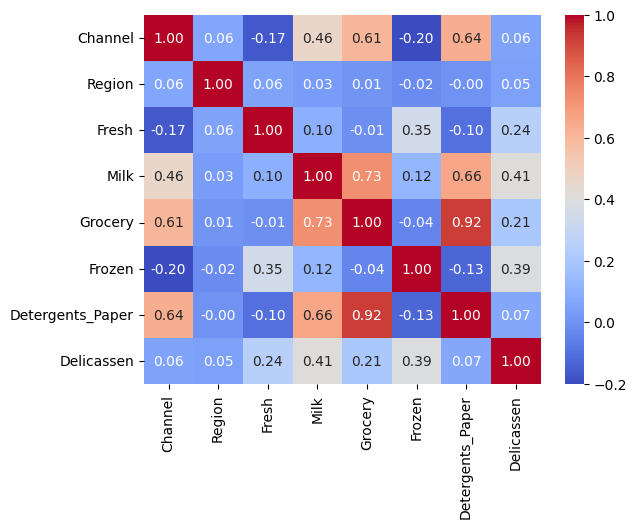

In [11]:
corr_matrix = wholesale_customers_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

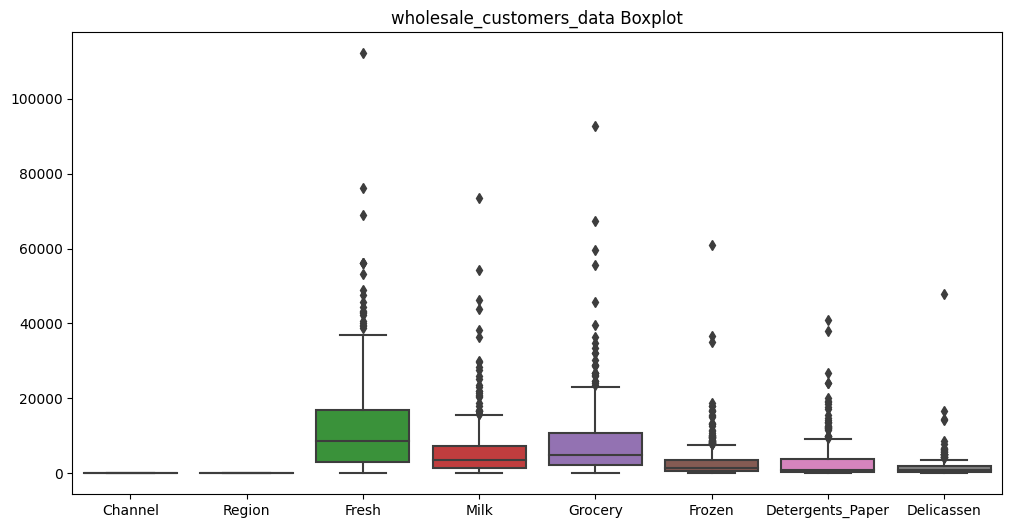

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wholesale_customers_data)
plt.title("wholesale_customers_data Boxplot")
plt.show()

In [13]:
skewness = wholesale_customers_data.skew()
print(skewness)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [14]:
# Your observations here

#No missing data.
#Detergents and papers has a somewhat correlation with some of the other features.
#Some features also have a wide range of values and a lot of outliers.
#There are some features with a very strong degree of skewness.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [15]:
# Your code here

#wholesale_customers_data = wholesale_customers_data.drop("Detergents_Paper", axis=1)


In [16]:
wholesale_customers_data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
# Your comment here

#I believe we should drop high correlated features and try to minimize the effect of outliers.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()

columns_to_scale = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

wholesale_customers_data[columns_to_scale] = scaler.fit_transform(wholesale_customers_data[columns_to_scale])


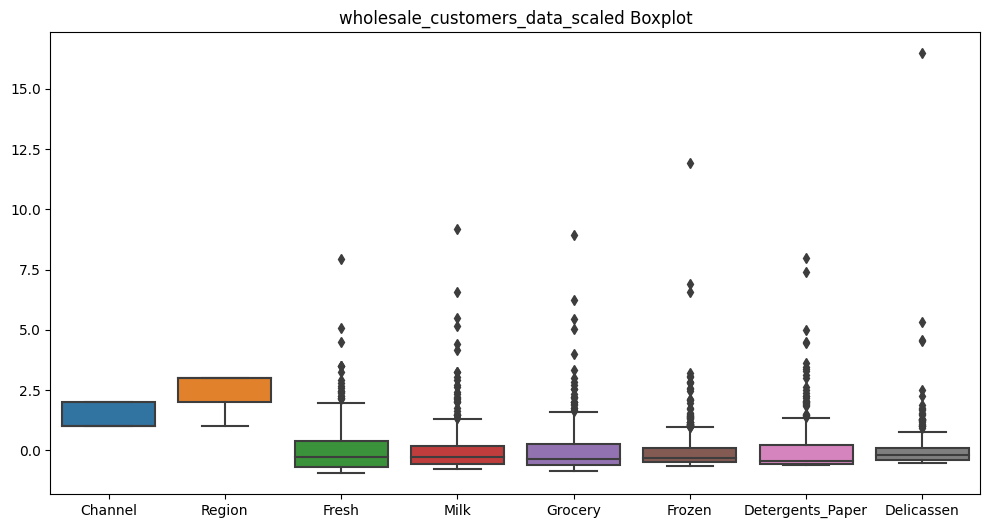

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wholesale_customers_data)
plt.title("wholesale_customers_data_scaled Boxplot")
plt.show()

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
# Your code here:

from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters=3, random_state=42)

KMeans.fit(wholesale_customers_data[columns_to_scale])


/Users/josecerqueira/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [21]:
wholesale_customers_data["labels"] = KMeans.labels_

Count the values in `labels`.

In [22]:
# Your code here:

count = wholesale_customers_data["labels"].value_counts()
print(count)

0    393
2     43
1      4
Name: labels, dtype: int64


from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))


pca = PCA(n_components=2)
principal_components = pca.fit_transform(wholesale_customers_data[columns_to_scale])

# Scatter plot of the first two principal components, colored by cluster labels
for label in wholesale_customers_data['labels'].unique():
    cluster_data = principal_components[wholesale_customers_data['labels'] == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}')

plt.title('Clustered Data Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [23]:
# Your code here

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)

dbscan.fit(wholesale_customers_data[columns_to_scale])


DBSCAN()

In [24]:
wholesale_customers_data["labels_dbscan"] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [25]:
count_dbscan = wholesale_customers_data["labels_dbscan"].value_counts()
print(count_dbscan)

 0    261
-1    174
 1      5
Name: labels_dbscan, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

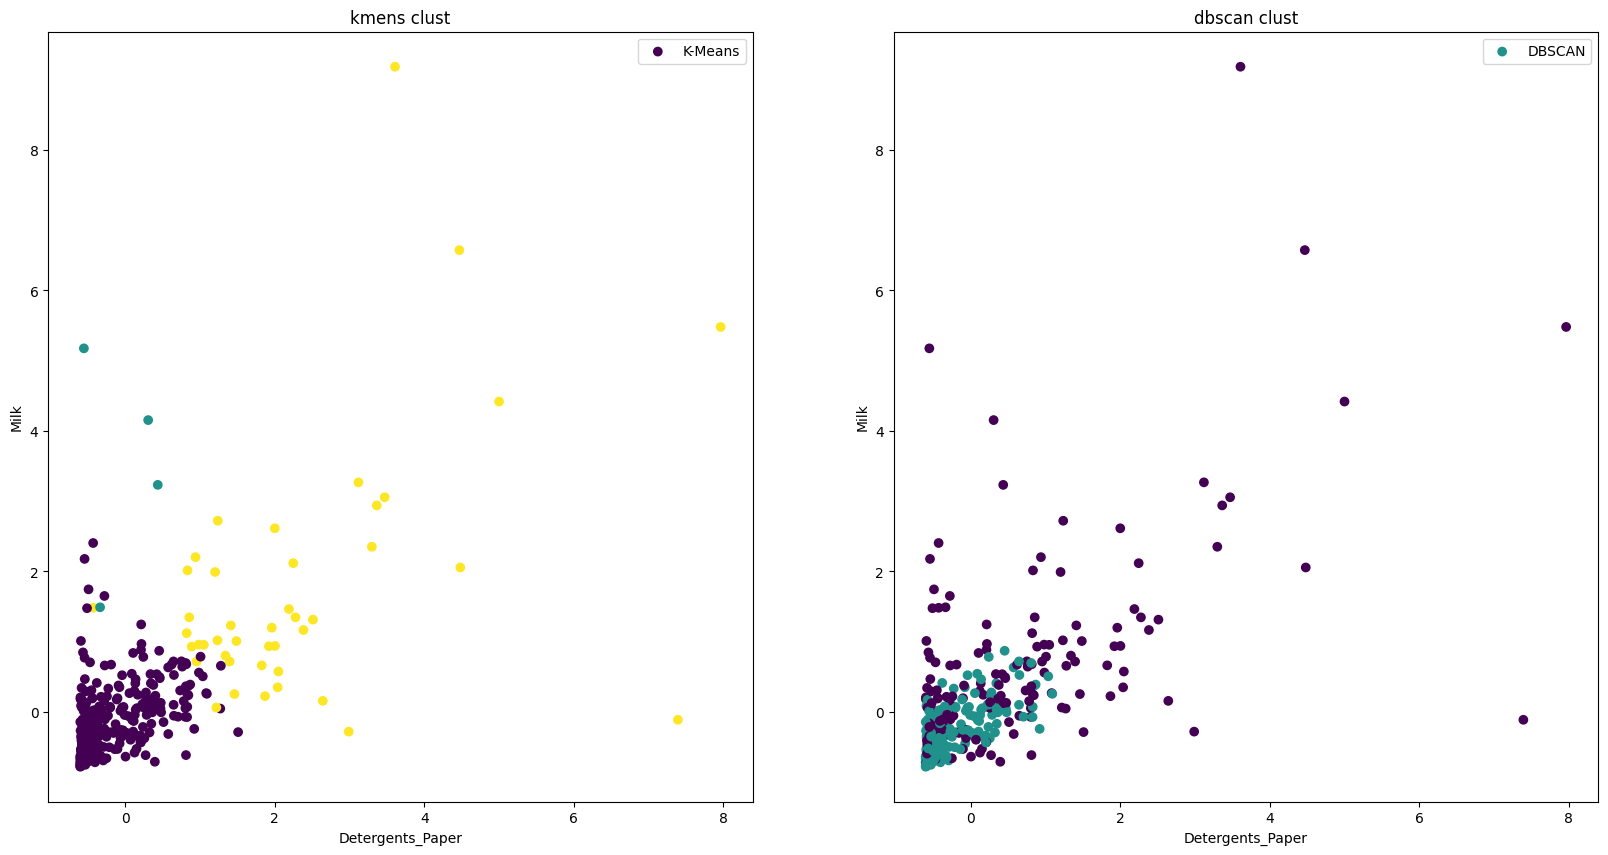

In [45]:
# Your code here:

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(wholesale_customers_data["Detergents_Paper"], 
               wholesale_customers_data["Milk"], 
               c=wholesale_customers_data["labels"], 
               cmap="viridis", 
               label="K-Means")
axs[0].set_title("kmens clust")
axs[0].set_xlabel("Detergents_Paper")
axs[0].set_ylabel("Milk")
axs[0].legend()

axs[1].scatter(wholesale_customers_data["Detergents_Paper"], 
               wholesale_customers_data["Milk"], 
               c=wholesale_customers_data["labels_dbscan"], 
               cmap="viridis", 
               label="DBSCAN")
axs[1].set_title("dbscan clust")
axs[1].set_xlabel("Detergents_Paper")
axs[1].set_ylabel("Milk")
axs[1].legend()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

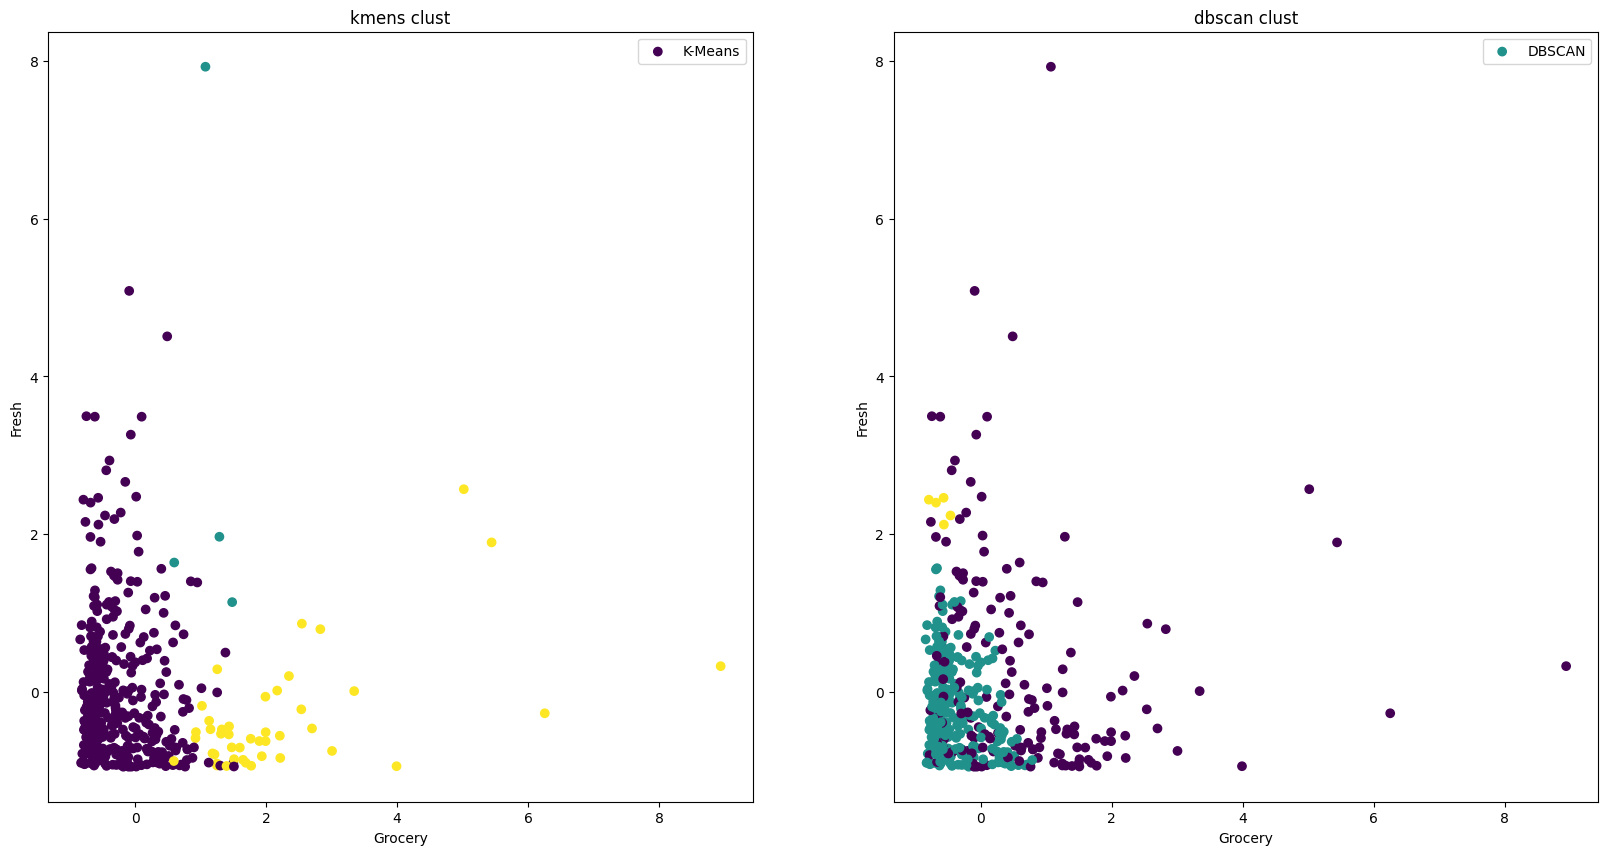

In [44]:
# Your code here:

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(wholesale_customers_data["Grocery"], 
               wholesale_customers_data["Fresh"], 
               c=wholesale_customers_data["labels"], 
               cmap="viridis", 
               label="K-Means")
axs[0].set_title("kmens clust")
axs[0].set_xlabel("Grocery")
axs[0].set_ylabel("Fresh")
axs[0].legend()

axs[1].scatter(wholesale_customers_data["Grocery"], 
               wholesale_customers_data["Fresh"], 
               c=wholesale_customers_data["labels_dbscan"], 
               cmap="viridis", 
               label="DBSCAN")
axs[1].set_title("dbscan clust")
axs[1].set_xlabel("Grocery")
axs[1].set_ylabel("Fresh")
axs[1].legend()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

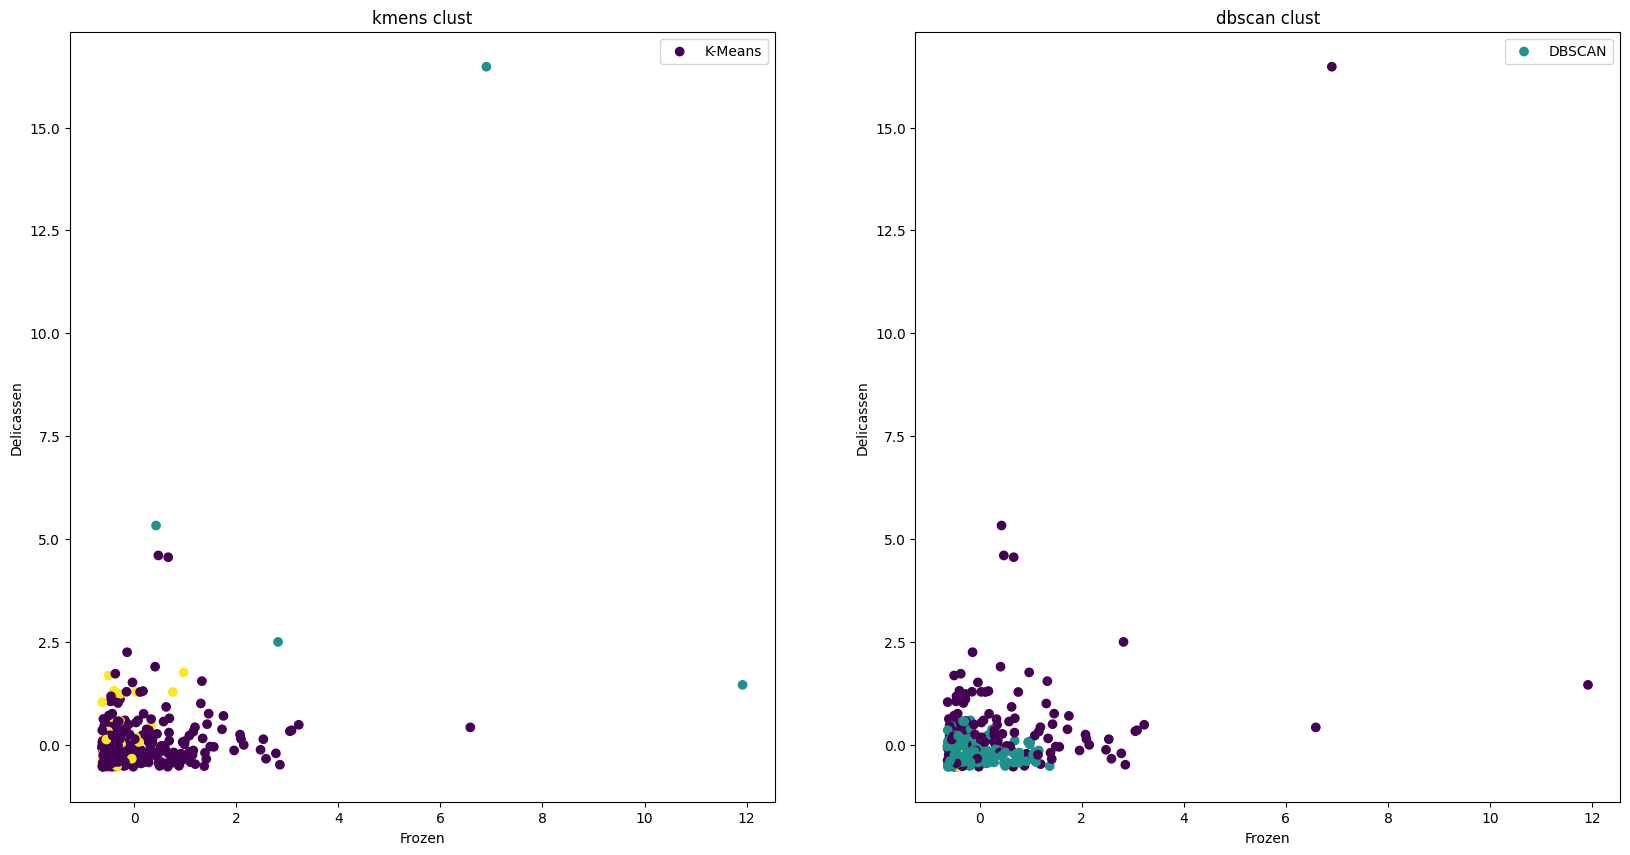

In [42]:
# Your code here:

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(wholesale_customers_data["Frozen"], 
               wholesale_customers_data["Delicassen"], 
               c=wholesale_customers_data["labels"], 
               cmap="viridis", 
               label="K-Means")
axs[0].set_title("kmens clust")
axs[0].set_xlabel("Frozen")
axs[0].set_ylabel("Delicassen")
axs[0].legend()

axs[1].scatter(wholesale_customers_data["Frozen"], 
               wholesale_customers_data["Delicassen"], 
               c=wholesale_customers_data["labels_dbscan"], 
               cmap="viridis", 
               label="DBSCAN")
axs[1].set_title("dbscan clust")
axs[1].set_xlabel("Frozen")
axs[1].set_ylabel("Delicassen")
axs[1].legend()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [47]:
# Your code here:

kmens_mean = wholesale_customers_data.groupby("labels")
kmens_mean.mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_dbscan
labels,,,,,,,,,
0,1.249364,2.547074,0.004957,-0.228048,-0.254553,-0.027068,-0.248890,-0.080143,-0.310433
1,1.250000,2.750000,3.168041,3.513264,1.110311,5.517163,-0.038319,6.436644,-1.000000
2,2.000000,2.488372,-0.340002,1.757437,2.223213,-0.265839,2.278305,0.133716,-1.000000


In [48]:
dbscane_mean = wholesale_customers_data.groupby("labels_dbscan")
dbscane_mean.mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_dbscan,,,,,,,,,
-1,1.522989,2.551724,0.285657,0.570286,0.604910,0.353535,0.506019,0.349999,0.517241
0,1.195402,2.528736,-0.235092,-0.368822,-0.391601,-0.228596,-0.327429,-0.228299,0.000000
1,1.000000,3.000000,2.330913,-0.593472,-0.609298,-0.370277,-0.517654,-0.262725,0.000000


Which algorithm appears to perform better?

In [49]:
# Your observations here

#My interpretation is that by looking at the means, the values with the most spread values by labels should be the one performing the best.
#We can confirm it visually.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [31]:
# Your code here

In [32]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [33]:
# Your code here

In [34]:
# Your comment here